<a href="https://colab.research.google.com/github/Benjamin-Siebold/MSDS686-Deep-Learning/blob/main/Fuel_Efficiency_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Efficiency Assingment
## Adapted from TensorFlow Tutorials
#### Using the Boston Housing jupyter notebook as an example follow the prompts below to build a neural network to predict vehicle fuel efficiency

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend
tf.random.set_seed(486)

In [ ]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [ ]:
# Add labels to columns and view dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
# Vehicle orgin needs to be encoded to factors.  
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [ ]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [ ]:
# Remove missing data
dataset.isnull().sum()
dataset = dataset.dropna()

In [ ]:
# Split dataset into y tragets and remove the targets from the dataset.  We are predicting MPG (fuel efficiencey) so the targets are MPG
mpg = dataset.pop('MPG')
dataset.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
USA             float64
Europe          float64
Japan           float64
dtype: object

In [ ]:
dataset = dataset.to_numpy()
mpg = mpg.to_numpy()

In [ ]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
train_data, test_data, train_targets, test_targets = train_test_split(dataset, mpg, test_size=.2, shuffle=True)

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)
train_data[0:5, :]

(313, 9)
(79, 9)
(313,)
(79,)


array([[8.000e+00, 3.180e+02, 1.500e+02, 3.399e+03, 1.100e+01, 7.300e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [8.000e+00, 3.040e+02, 1.500e+02, 3.672e+03, 1.150e+01, 7.300e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 8.600e+01, 6.400e+01, 1.875e+03, 1.640e+01, 8.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [6.000e+00, 2.310e+02, 1.100e+02, 3.039e+03, 1.500e+01, 7.500e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 9.800e+01, 8.300e+01, 2.219e+03, 1.650e+01, 7.400e+01,
        0.000e+00, 1.000e+00, 0.000e+00]])

In [ ]:
# Normalize the data by subratcing the mean from each feature and divid by one standard deviation
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
print(mean)

[5.48881789e+00 1.96044728e+02 1.04591054e+02 2.99014377e+03
 1.55364217e+01 7.60734824e+01 6.35782748e-01 1.66134185e-01
 1.98083067e-01]


In [ ]:
train_data[0:5,:]

array([[ 1.46935653,  1.16278989,  1.17568915,  0.48235596, -1.59711272,
        -0.8327784 ,  0.75687801, -0.44635604, -0.49700297],
       [ 1.46935653,  1.02930605,  1.17568915,  0.80443293, -1.4210805 ,
        -0.8327784 ,  0.75687801, -0.44635604, -0.49700297],
       [-0.87114522, -1.0492281 , -1.05094847, -1.3156122 ,  0.30403519,
         1.33486933,  0.75687801, -0.44635604, -0.49700297],
       [ 0.29910566,  0.33328314,  0.14004374,  0.05763907, -0.18885501,
        -0.29086647,  0.75687801, -0.44635604, -0.49700297],
       [-0.87114522, -0.93481338, -0.5590169 , -0.90977161,  0.33924163,
        -0.56182243, -1.32121688,  2.24036398, -0.49700297]])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_targets, test_size = .2, shuffle=True)

In [ ]:
# Built a sequential neural network model.  Start with backend.clear_session()
# Think about what activation function you will use, the input shape, number of nodes, and output shape and activation
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

In [ ]:
# Fit the model.  Use 1000 epochs.  Add a validation spit to your model.  Set verbose = 0.
history = model.fit(x_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 0)

In [ ]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

         loss       mae   val_loss   val_mae
995  3.736893  1.328085  10.004972  2.300015
996  3.707886  1.311459   9.974962  2.271933
997  3.727325  1.321698  10.146678  2.295351
998  3.756240  1.331270  10.436465  2.350700
999  3.750152  1.337772  10.321847  2.356571


In [ ]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

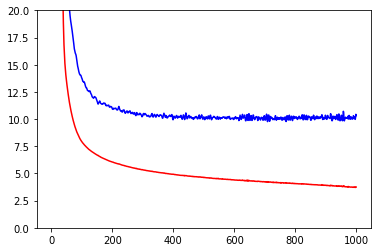

In [ ]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,20)
plt.show()

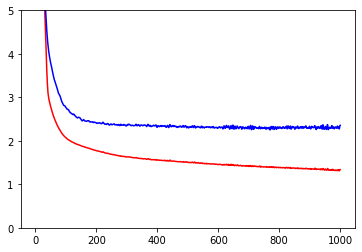

In [ ]:
# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training mae')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation mae')
plt.ylim(0,5)
plt.show()

In [ ]:
# Evaluate the model on the test data and print the results
results = model.evaluate(test_data, test_targets)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 2ms/step - loss: 6.5794 - mae: 1.8306
[6.579435348510742, 1.8305854797363281]
['loss', 'mae']


In [ ]:
predictions = model.predict(test_data)
test_df = pd.DataFrame(test_data)
pred = pd.DataFrame(predictions)
targets = pd.DataFrame(test_targets)
test_df['targets'] = targets
test_df['pred'] = pred
test_df.sort_values(by=['pred'])

,0,1,2,3,4,5,6,7,8,targets,pred
61,1.469357,1.563241,2.858613,1.916955,-0.540919,-1.645646,0.756878,-0.446356,-0.497003,10.0,10.616920
10,1.469357,1.057910,2.470246,1.634990,-0.188855,-1.645646,0.756878,-0.446356,-0.497003,10.0,11.215598
18,1.469357,1.944624,2.211335,1.689260,-1.069016,-1.103734,0.756878,-0.446356,-0.497003,13.0,11.699726
70,1.469357,1.467896,1.822968,1.309374,-0.892984,-0.832778,0.756878,-0.446356,-0.497003,13.0,11.980147
54,1.469357,2.221126,2.677375,1.938191,-1.597113,-1.103734,0.756878,-0.446356,-0.497003,11.0,12.422111
...,...,...,...,...,...,...,...,...,...,...,...
8,-0.871145,-1.020624,-1.154513,-1.205894,1.148990,1.063913,-1.321217,-0.446356,2.012060,38.1,37.217896
22,-0.871145,-1.001555,-0.973275,-1.209433,-0.188855,1.605825,-1.321217,-0.446356,2.012060,38.0,38.137806
12,-0.871145,-1.096901,-1.154513,-1.451286,0.198416,1.334869,-1.321217,-0.446356,2.012060,35.1,38.543369
60,-0.871145,-1.001555,-0.947384,-1.203534,0.726513,1.605825,-1.321217,-0.446356,2.012060,31.0,38.768700


Above the model shows there is an average of 1.83 mpg off, and when considering the targets are ranging from 9 mpg to 46 mp, that value could be 5%-20% inaccuracte, and with compared to the mean of the mpg (~23) it is still 8% off, which is not phenomenal. Below we run 3 different models with different parameters to see if we can reduce the mae of the model.

In [ ]:
# Clear your session using this command: backend.clear_session() 
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'sigmoid', input_shape = (train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'sigmoid'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history = model.fit(x_train,
                    y_train,
                    epochs = 2000,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 0)

results = model.evaluate(test_data, test_targets)
print(results)

3/3 [==============================] - 0s 2ms/step - loss: 6.8382 - mae: 1.9807
[6.838169574737549, 1.9806506633758545]


In [ ]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (train_data.shape[1],)))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history = model.fit(x_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 0)

results = model.evaluate(test_data, test_targets)
print(results)

3/3 [==============================] - 0s 3ms/step - loss: 12.9231 - mae: 2.2516
[12.923066139221191, 2.2516250610351562]


In [ ]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history = model.fit(x_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 0)

results = model.evaluate(test_data, test_targets)
print(results)

3/3 [==============================] - 0s 2ms/step - loss: 15.5422 - mae: 2.3977
[15.542171478271484, 2.397670030593872]


Above, three models were attempted to improve the performance.
1) identical network with a different activation and more epochs
2) a network with nodes decreasing at each level
3) a network with identical layers and a layer for every feature.

All of these changes went without decreasing the mae, thus it seems our original model may in simplistic measures be the most performant. Next steps could be to tweak the optimizers according to the learning rate, beta, and epsilon parameters from the keras documentation, or further investigate activation measures.


References:

https://keras.io/api/layers/activations/
https://faroit.com/keras-docs/0.2.0/optimizers/
https://keras.io/api/optimizers/